In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook
#%matplotlib inline
#%matplotlib auto
import pylab as plt
import numpy
import random
import math
#

### Some toy codes and tests...
- This notebook includes a small collection of puzzles and toy codes.
- They can be used to hone fundametal coding technique, etc.
- These are all relatively quick drafts, so they may not be fully optimized or they might be written for readability more than for speed performance or minimal memory footprint optimization.

In [2]:
# look for consecutive digits in a string input.
# this is trivially simple; there is a more interesting variation where we do not permit the string
# conversion, so we use a modulus operator instead.
def hasConsecutiveDigits(n):
    #return 42 # replace with your solution
    n_str = str(n)
    #has_consecutive_digits = False
    n_consecutive_digits = 0
    for j,d in enumerate(n_str[1:]):
        if d==n_str[j]:
            # two consecutive digits are the same; increment counter:
            #n_consecutive_digits += 1
            n_consecutive_digits = True
            break
        #
    #
    # note: values >0 can evaluate True, though i guess not in an assert() statement.
    # so let's just do true/false, which means we can also exit early.
    #, otherwise we can actually get a count;
    #      the cost is basically the length of an integer vs a boolean.
    return n_consecutive_digits

def testHasConsecutiveDigits():
    print("Testing hasConsecutiveDigits()...", end="")
    assert(hasConsecutiveDigits(0) == False)
    assert(hasConsecutiveDigits(123456789) == False)
    assert(hasConsecutiveDigits(1212) == False)
    assert(hasConsecutiveDigits(1212111212) == True)
    assert(hasConsecutiveDigits(33) == True)
    assert(hasConsecutiveDigits(-1212111212) == True)
    print("Passed!")

testHasConsecutiveDigits()

Testing hasConsecutiveDigits()...Passed!


In [3]:
# a simple class to construct fibonacci sequences:
#
class Fibo_iterator(object):
    def __init__(self, n=0, verbose=False):
        #x0=1
        #x1=1
        #
        # initialize fibonacci sequence:
        X = [1,1]
        #
        j_fibo=0
        self.__dict__.update(locals())
        #
        n = (n or 0)
        self.get_nth(n)   
    #
    def __repr__(self):
        return str(self.x)
    def __val__(self):
        return self.x
    @property
    def x(self):
        return self.get_current()
    #
    def get_current(self):
        return self.X[1]

    #
    def get_next(self):
        self.j_fibo+=1
        #
        if self.j_fibo<=2:
            return self.X[self.j_fibo-1]
        
        x = self.X[0] + self.X[1]
        self.X[0] = self.X[1]
        self.X[1] = x
        #
        return x
    #
    def get_prev(self):
        if self.j_fibo==0:
            return 1
        if self.j_fibo==1:
            self.j_fibo-=1
            return 1
        #
        x2 = self.X[1] - self.X[0]
        x1 = self.X[0]
        #x1 = self.X[0] - x2
        #
        self.X = [x2,x1]
        self.j_fibo-=1
        #
        #print('X: ', self.X)
        return self.X[-1]
    #
    def reset(self):
        self.__init__()
    def get_nth(self, n):
        # we could walk this backwards, always start over, or do this...
        while self.j_fibo>n:
            if self.verbose: print('preving: ', self.X)
            x = self.get_prev()
        #
        while self.j_fibo<n:
            if self.verbose: print("nexting: ", self.X)
            x = self.get_next()
        #
        return self.X[-1]
    #
#

In [4]:
def fibo_test_script_1():
    my_fibo = Fibo_iterator()
    fbs = [my_fibo.get_next() for _ in range(15)]
    #
    print(' fibos should be: {}'.format('1 1 2 3 5 8 13 21 34 55 89 144 233 377 610 987'))
    print('fibos: ', fbs)
    #
    for k in (4,5,7,10,4,3):
        print('fibo [{}]: {}: '.format(k, my_fibo.get_nth(k)))
    #
    my_fibo = Fibo_iterator()
    print('fibo[7]: {}'.format(my_fibo.get_nth(7)))
    #
    print('check the next(), prev() functions:')
    print('prev: ', my_fibo.get_prev())
    print('next: ', my_fibo.get_next())
    #
    print('some fibo.get_nth() examples:')
    for k in 15, 10, 10, 15, 20, 15:
        print('fibo[{}]: {}'.format(k, my_fibo.get_nth(k)))

#     print(my_fibo.get_nth(10))

#     print(my_fibo.get_nth(10))
#     print(my_fibo.get_nth(15))
#     print(my_fibo.get_nth(20))
#     print(my_fibo.get_nth(15))
    #
    k_fibo = 5
    print('\nFibo_iterator({}) (instantiates a fibo itrator at k={}; shows the current generation values): '.format(k_fibo, k_fibo))
    my_fibo=Fibo_iterator(5)
    print(my_fibo.X)
#
x = fibo_test_script_1()

 fibos should be: 1 1 2 3 5 8 13 21 34 55 89 144 233 377 610 987
fibos:  [1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610]
fibo [4]: 3: 
fibo [5]: 5: 
fibo [7]: 13: 
fibo [10]: 55: 
fibo [4]: 3: 
fibo [3]: 2: 
fibo[7]: 13
check the next(), prev() functions:
prev:  8
next:  13
some fibo.get_nth() examples:
fibo[15]: 610
fibo[10]: 55
fibo[10]: 55
fibo[15]: 610
fibo[20]: 6765
fibo[15]: 610

Fibo_iterator(5) (instantiates a fibo itrator at k=5; shows the current generation values): 
[3, 5]


### Circle Counter Thing:
- I don't rememer the initial context of this toy project, but here's what we have:
- Write a class (or script) to separate points inside a unit square into two categories, those that fall inside the contained unit circle to those that fall outside of it (between the unit circle and unit square).
- What is the ratio of the points iside/outside the circle?
- How does this relate to the area of the circle (noting that we might later substitute a more complex shape):
    - Note: We can aprroximate the area if we can account for the percent coverage, but probably a more meaningful approach is to compare the number in/out of the shape of interest (the circle) to the area of a known shape (the square).
- Can we compute pi from this? Answer: Yes. Yes we can.

In [5]:
class Random_circle_counter(object):
    def __init__(self, N=1000, x_min=-1., y_min=-1., x_max=1., y_max=1.):
        #
        Rx = random.Random()
        Ry = random.Random()
        #
        dx = x_max - x_min
        dy = y_max - y_min
        rx = .5*dx
        ry = .5*dy
        #
        #
        n_inside = 0
        n_outside = 0
        outsides = []
        insides = []
        for j in range(N):
            x = Rx.random()*dx + x_min
            y = Ry.random()*dy + y_min
            #
            #if x!=0:
            #    theta = math.atan(y/x)
            #else:
            #    theta = .5*numpy.pi*( 2.*(-.5 + (y>0)))
            #
            #if (x*x + y*y) > .5*(rx*rx + ry*ry):
            if y*y > ry*ry*(1.-x*x/rx**2.):
                # outside:
                outsides += [[x,y]]
                n_outside += 1
            else:
                insides += [[x,y]]
                n_inside += 1
        #
        self.__dict__.update(locals())
    #
    def plotit(self, fignum=None, ax=None, mkr='.', ms=2):
        #
        if fignum is None and ax is None:
            fg=plt.figure()
            plt.clf()
            ax=plt.gca()
        #
        ax.plot(*zip(*self.insides), color='b', ls='', marker=mkr, ms=ms, label='insies')
        ax.plot(*zip(*self.outsides), color='r', ls='', marker=mkr, ms=ms, label='outsies')
        ax.legend(loc=0)
        

<IPython.core.display.Javascript object>


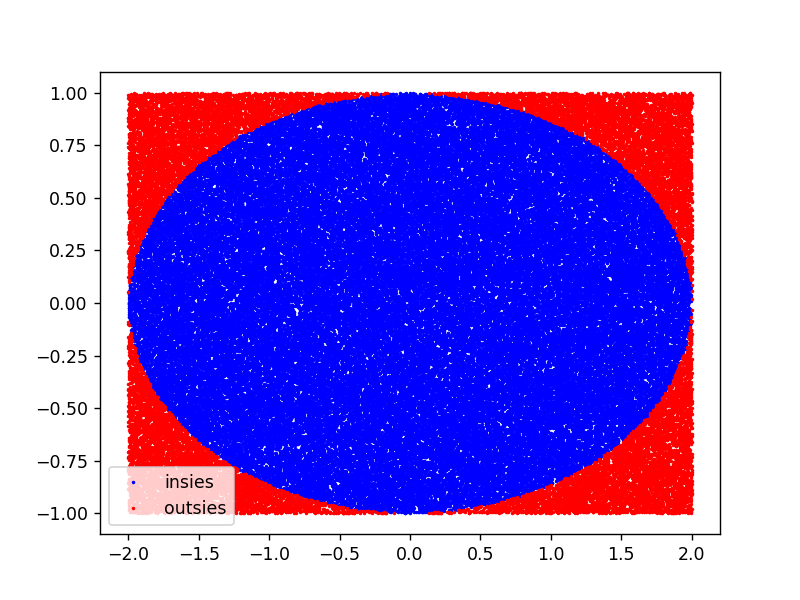

outsies area_factor:  0.21541  ::  0.21460183660255172


In [6]:
N=100000
RR = Random_circle_counter(N, x_min=-2., x_max=2., y_min=-1, y_max=1.)
RR.plotit()
print('outsies area_factor: ', RR.n_outside/float(N), ' :: ', (RR.dx*RR.dy - numpy.pi*RR.rx*RR.ry)/(RR.dx*RR.dy))

In [7]:
# The percent area outside the circle should be:
side_len = 1.0
#area_ratio_should_be = (1. - 3.141*.25)
area_ratio_should_be = (side_len**2. - 3.141*(side_len/2.)**2.)
#
print('percent outside the circle should be: {}'.format(area_ratio_should_be))
# and we get:
print('... and we get: ', RR.n_outside/float(N))
#
# and let's use this to estimate pi?
my_pi = (RR.n_inside/RR.N)*4.
print('my_pi: ', my_pi)

percent outside the circle should be: 0.21475
... and we get:  0.21541
my_pi:  3.13836


In [14]:
class Fibo(list):
    # a simple Fibonacci iterator that uses recursion:
    def __init__(self, n):
        # get the n'th iteration of the fibonacci sequence. let's just treat 0,1,2 as 2,
        # so the len(2) sequence, 1,1
        #
        n = max(n,2)
        #
        #my_seq = self.get_fibo(5,None)
        super(Fibo,self).__init__(self.get_fibo(n, seq=None))
        #super(Fibo,self).__init__(my_seq)
    #
    def get_fibo(self, n, seq=None):
        if seq is None: seq = [0,1]
        #if seq is None: break
        #
        seq+=[seq[-2] + seq[-1]]
        print('*** ', seq)
        while len(seq)<n:
            #
            seq = self.get_fibo(n, seq)
        return seq
        #
    #
my_fibo = Fibo(n=6)
print('fibo: ', my_fibo)

***  [0, 1, 1]
***  [0, 1, 1, 2]
***  [0, 1, 1, 2, 3]
***  [0, 1, 1, 2, 3, 5]
fibo:  [0, 1, 1, 2, 3, 5]
